## Observations and Insights 

1. Of the 4 most promising drugs, Capomulin and Ramocane resulted in the lowest final tumor volume.
2. For the Capomulin treatment, average tumor volume is positively correlated with weight. As the mouse weight increases, the average tumor weight increases.
3. There was more variability in the average tumor volumes for Infubinol & Ceftamin than there was for the better performing drugs Capomulin and Ramocane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
from scipy.stats import linregress
from matplotlib.pyplot import figure



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].nunique()

print(f"There are {mice_count} mice!")

There are 249 mice!


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse = pd.DataFrame(combined_df[combined_df.duplicated()]) 
duplicate_mouse_id = duplicate_mouse["Mouse ID"]
duplicate_mouse_id

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [5]:
#Create a new data frame that excludes the mouse with duplicates

clean_df = pd.DataFrame(combined_df[combined_df['Mouse ID'] != "g989"])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.

new_mice_count = clean_df["Mouse ID"].nunique()
print(f"Now there are {new_mice_count} mice.")

Now there are 248 mice.


## Summary Statistics

In [7]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_df = clean_df.groupby("Drug Regimen")

mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary_dict = {
    "Mean (mm3)": mean,
    "Median (mm3)": median,
    "Variance": variance,
    "Standard Deviation": std_dev,
    "SEM": sem
}
tumor_summary_df = pd.DataFrame(tumor_summary_dict)
tumor_summary_df.head()

,Mean (mm3),Median (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

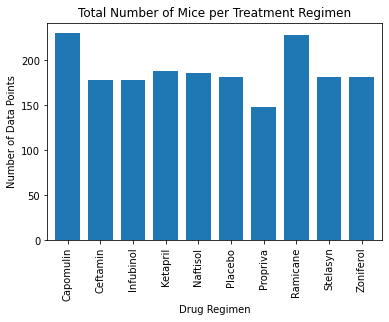

In [62]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

ax = mouse_count.plot.bar(rot=90, width = .75, figsize=(6,4), title='Total Number of Treatments for Each Drug Regimen')
ax.set_ylabel("Number of Data Points")

In [61]:
#Reformat clean dataframe
cleaner_df = clean_df.groupby('Drug Regimen', as_index=False).agg({"Mouse ID": "count"})
cleaner_df = cleaner_df.set_index("Drug Regimen")

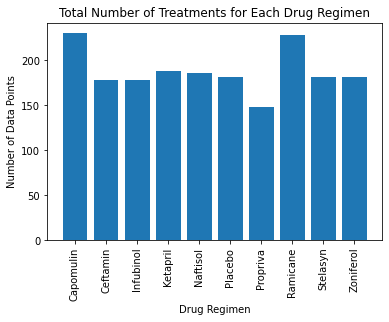

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Create an array that contains the number of users each language has

plt.bar(cleaner_df.index.values, cleaner_df["Mouse ID"])

plt.xticks(rotation = 90)

# Add Y Label
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.title("Total Number of Treatments for Each Drug Regimen")

plt.show()

Text(0, 0.5, 'Sex')

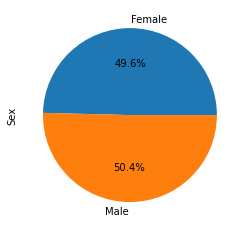

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex")["Mouse ID"].nunique()

plot = gender.plot.pie(figsize=(4, 4), autopct="%1.1f%%")
plot.set_ylabel('Sex')

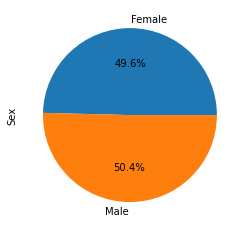

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df.groupby('Sex', as_index=False).agg({"Mouse ID": "nunique"})

genders = gender['Sex'].tolist()
mice_gender_count = gender['Mouse ID'].tolist()

labels = genders
sizes = mice_gender_count

plt.pie(sizes, labels=labels,
        autopct="%1.1f%%", startangle=0)

plt.ylabel("Sex")

plt.show()



## Quartiles, Outliers and Boxplots

In [70]:
##Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four 
##treatment regimens and highlight any potential outliers in the plot by changing their color and style.

# Start by getting the last (greatest) timepoint for each mouse 
mouse_id_max = clean_df.groupby("Mouse ID")

new_mouse_max = mouse_id_max["Timepoint"].max() 
new_mouse_max = new_mouse_max.reset_index()
new_mouse_max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(new_mouse_max, clean_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_df = merged_df.set_index("Mouse ID")

In [71]:
# Put treatments into a list for for loop (and later for plot labels)
best_drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_data = []

for x in best_drug_regimens:
    tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    drug_data.append(tumor_volume)
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

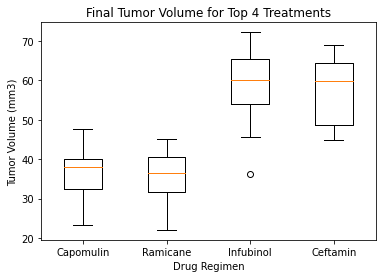

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_data, labels=best_drug_regimens)

plt.title("Final Tumor Volume for Top 4 Treatments")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

In [74]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. timepoint for that mouse.

#Filter the dataframe to only contain mice treated with Capomulin
capomulin =  clean_df["Drug Regimen"]=="Capomulin"
only_capomulin = clean_df[capomulin]

In [75]:
#Find out how many mice were treated with Capomulin. 
number_capomulin = len(only_capomulin)

#Pick a random number that ranges from 1 to the total number of mice treated with Capomulin
random_number = random.randrange(1, number_capomulin)
random_number

#Every time this cell runs, this part will get data for a random mouse treated with Capomulin
random_mouse = only_capomulin.iloc[random_number][0]

#Create a dataframe based on this random mouse (This will change each time the cell is run)
random_df = only_capomulin.loc[only_capomulin['Mouse ID'] == random_mouse] 
print(f"Mouse ID {random_mouse} was chosen at random.")
random_df.head()

Mouse ID t565 was chosen at random.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
155,t565,Capomulin,Female,20,17,0,45.000000,0
156,t565,Capomulin,Female,20,17,5,45.895647,0
157,t565,Capomulin,Female,20,17,10,46.749006,0
158,t565,Capomulin,Female,20,17,15,44.440949,0
159,t565,Capomulin,Female,20,17,20,39.070214,0


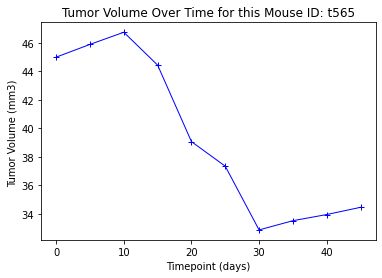

In [80]:
# #Generate a line plot of tumor volume vs. timepoint for this mouse
random_tumor_volume = random_df['Tumor Volume (mm3)'].tolist()


x_axis = np.arange(0,50,5)

mouse, = plt.plot(x_axis, random_tumor_volume, marker="+",color="blue", linewidth=1, label="Mouse")

#Add labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3) ")

plt.title(f"Tumor Volume Over Time for this Mouse ID: {random_mouse}")

# Set your x and y limits
# plt.xlim(0, 40)

plt.show()

In [81]:
%matplotlib notebook

<IPython.core.display.Javascript object>


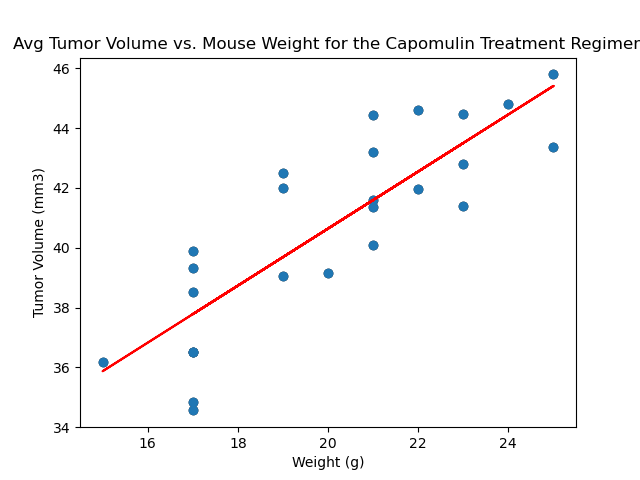

Text(0, 0.5, 'Tumor Volume (mm3)')

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

avg_tumor_volume = only_capomulin.groupby(["Mouse ID"]).mean()


plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            alpha=1)

plt.title("Avg Tumor Volume vs. Mouse Weight for the Capomulin Treatment Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


## Correlation and Regression

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor_volume["Weight (g)"],avg_tumor_volume["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


In [84]:
x_values = avg_tumor_volume["Weight (g)"]
y_values = avg_tumor_volume["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()